## Preparing the expression data 

In [3]:
import pandas as pd 
import glob
import numpy as np
import os 
import dask.dataframe as dd


/home/llan/miniconda3/envs/torch/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:15: FutureWarning: Minimal version of pyarrow will soon be increased to 14.0.1. You are using 11.0.0. Please consider upgrading.
  warnings.warn(


In [4]:
os.chdir("/home/llan/Desktop/WUR/thesis2/")


In [5]:
info = pd.read_csv("EXP/OriginalData/sample_data.tsv", sep="\t")


In [14]:
to_inc = ((info.uniquelymapped >= 0.9) & (info.ecotype == "Col-0") & (info.genotype == "wild type"))


In [15]:
columns_include = info[to_inc]["sample"].tolist()


In [16]:
path = "EXP/OriginalData/gene_FPKM_200501.csv"
df = dd.read_csv(path, blocksize=int(25e6), sample=int(1e6))


In [17]:
columns_include = ["Sample"] + columns_include


In [18]:
df = df[["Sample"]  + columns_include]
df = df.repartition(npartitions=1)
df.to_csv("expression.csv", single_file=True)


KeyboardInterrupt: 

In [ ]:
df.index = df.Sample


In [ ]:
exp_data = pd.read_csv("expression.csv", index_col=0)


In [ ]:
exp_data.index = exp_data.Sample


In [ ]:
exp_data.drop(columns="Sample", inplace=True)


In [ ]:
mat = exp_data.to_numpy()


In [ ]:
mybb = "AT5G67300"
tfs.loc[tfs["ID"] == mybb]


,ID,idx
1712,AT5G67300,37012


['With Targets', 'Without Targets']

### merging 

In [ ]:
# loading in the expression dataframes and concatenating 

data_dir = "../EXP"

files = glob.glob(data_dir + "/*.csv")

exp_dfs = []
for file in files:
    df = pd.read_csv(file, skiprows=0, header=1, index_col=0)
    exp_dfs.append(df)
    print(df.shape)


(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 105)
(37336, 48)


In [ ]:
info_cols = exp_dfs[0].iloc[:,-5:].copy()


In [14]:
for df in exp_dfs:
    df.drop(info_cols.columns, axis=1, inplace=True)
    

In [15]:
exp_merged = exp_dfs[0]
for i in range(len(exp_dfs) - 1):
    exp_merged = pd.merge(exp_merged, exp_dfs[i+1], left_index=True, right_index=True)


In [ ]:
df =df.drop(columns="Sample")


,DRX019488,DRX026439,DRX039919,DRX039923,DRX039924,DRX039925,DRX066823,DRX066824,DRX066825,DRX078166,DRX078167,DRX078168,DRX078169,DRX078170,DRX084087,DRX099517,DRX099518,DRX099519,ERX1043124,ERX1043125,ERX1043126,ERX1268141,ERX1268146,ERX1268150,ERX1663062,ERX1663063,ERX1663064,ERX1664259,ERX1719916,ERX1936694,ERX1936695,ERX1936696,ERX2244582,ERX442535,ERX981475,ERX981476,ERX981477,GSM1014135,GSM1054087,GSM1054088,GSM1054089,GSM1088166,GSM1165953,GSM1199007,GSM1199008,GSM1233274,GSM1252086,GSM1298725,GSM1298726,GSM1298727,GSM1298728,GSM1298729,GSM1298730,GSM1298731,GSM1298732,GSM1298733,GSM1340623,GSM1369669,GSM1369670,GSM1383672,GSM1477531,GSM1477532,GSM1501691,GSM1501692,GSM1529981,GSM1550354,GSM1550355,GSM1550356,GSM1553425,GSM1553427,GSM1585889,GSM1585890,GSM1585891,GSM1603462,GSM1603463,GSM1603464,GSM1627450,GSM1627451,GSM1627452,GSM1631195,GSM1631196,GSM1631197,GSM1631198,GSM1631200,GSM1653210,GSM1656309,GSM1656310,GSM1679002,GSM1679003,GSM1679006,GSM1679007,GSM1679010,GSM1679011,GSM1679014,GSM1679015,GSM1717064,GSM1818916,GSM1818922,GSM1818927,GSM1818928,GSM1818929,GSM1858952,GSM1858953,GSM1858954,GSM1862904,GSM1862905,GSM1862906,GSM1862907,GSM1862908,GSM1864019,GSM1864951,GSM1864952,GSM1864955,GSM1864956,GSM1864959,GSM1864960,GSM1864963,GSM1864967,GSM1864971,GSM1864972,GSM1868687,GSM1868688,GSM1868689,GSM1868696,GSM1930276,GSM1930277,GSM1930278,GSM1930280,GSM1930281,GSM1930282,GSM1930283,GSM1930284,GSM1930285,GSM1930286,GSM1930287,GSM1930288,GSM1930289,GSM1930290,GSM1930291,GSM1930292,GSM1930293,GSM1930294,GSM1930295,GSM1930763,GSM1930764,GSM1930834,GSM1930835,GSM1938989,GSM1938990,GSM1938993,GSM1938994,GSM1938997,GSM1938998,GSM1958067,GSM1958068,GSM1958069,GSM1970976,GSM1978184,GSM1978185,GSM1978186,GSM1978187,GSM2028158,GSM2028159,GSM2028161,GSM2028162,GSM2028164,GSM2028166,GSM2038041,GSM2042524,GSM2042526,GSM2042536,GSM2042537,GSM2042538,GSM2051715,GSM2081554,GSM2081555,GSM2098509,GSM2098512,GSM2098518,GSM2098524,GSM2107305,GSM2107306,GSM2107307,GSM2107309,GSM2107310,GSM2107311,GSM2107312,GSM2107325,GSM2107326,GSM2107328,GSM2107329,GSM2107330,GSM2124010,GSM2124980,GSM2124981,GSM2124982,GSM2124983,GSM2124984,GSM2124985,GSM2133905,GSM2144051,GSM2144052,GSM2144053,GSM2144054,GSM2144055,GSM2144056,GSM2144057,GSM2144058,GSM2144059,GSM2144062,GSM2144065,GSM2144067,GSM2157790,GSM2157791,GSM2157792,GSM2159757,GSM2159758,GSM2181692,GSM2181693,GSM2181694,GSM2181695,GSM2181696,GSM2181697,GSM2181698,GSM2181700,GSM2181701,GSM2181702,GSM2181703,GSM2242708,GSM2242709,GSM2242710,GSM2257305,GSM2280286,GSM2280287,GSM2280288,GSM2280289,GSM2280290,GSM2280291,GSM2280292,GSM2280293,GSM2280294,GSM2280295,GSM2280296,GSM2280297,GSM2286733,GSM2286734,GSM2286735,GSM2286736,GSM2286738,GSM2301214,GSM2301224,GSM2301225,GSM2301226,GSM2303795,GSM2303796,GSM2303797,GSM2303798,GSM2303799,GSM2303800,GSM2327833,GSM2327842,GSM2327844,GSM2330518,GSM2330520,GSM2330522,GSM2330524,GSM2332896,GSM2332898,GSM2341920,GSM2395424,GSM2395425,GSM2399911,GSM2429540,GSM2452497,GSM2452498,GSM2453041,GSM2453042,GSM2467110,GSM2467113,GSM2467116,GSM2467119,GSM2467122,GSM2467125,GSM2544984,GSM2544985,GSM2607989,GSM2607990,GSM2643667,GSM2643668,GSM2700471,GSM2700472,GSM847334,GSM847335,GSM847336,GSM847337,GSM847338,GSM847339,GSM912635,GSM951964,GSM951965,GSM951966,GSM951967,GSM988496,GSM988498,GSM988500,GSM988501,GSM988502,SRX1056702,SRX1056704,SRX1057345,SRX1057348,SRX1057349,SRX1057351,SRX1057352,SRX1057354,SRX1057355,SRX1057357,SRX1133307,SRX1133332,SRX1133333,SRX130140,SRX1426412,SRX1506471,SRX1506473,SRX1592545,SRX1593854,SRX1593862,SRX1597284,SRX1597374,SRX1597386,SRX1640001,SRX1640005,SRX1640010,SRX1640011,SRX1640012,SRX1640014,SRX1640015,SRX1640016,SRX1688672,SRX1688673,SRX1714284,SRX1714286,SRX1714288,SRX1714289,SRX1714290,SRX1960508,SRX2009821,SRX2009822,SRX2009834,SRX2009835,SRX2009836,SRX2009837,SRX2009838,SRX2009839,SRX2009840,SRX2040816,SRX2040817,SRX2040818,SRX2040819,SRX2040828,SRX2040838,SRX2040839,SRX2040840,SRX2040841,SRX2040842,SRX2040843,SRX2040844,S

In [ ]:
exp_merged = exp_merged.astype("float32")


In [ ]:
print(exp_merged.shape)
print(exp_merged.dtypes)
print(f"any na: {exp_merged.isna().values.any()}")
exp_merged.head()


(37336, 1343)
GSM2544985    float32
GSM2181694    float32
GSM2280287    float32
GSM2181695    float32
GSM2301225    float32
               ...   
SRX6960118    float32
SRX6792014    float32
SRX6792015    float32
SRX6960119    float32
SRX7759653    float32
Length: 1343, dtype: object
any na: False


,GSM2544985,GSM2181694,GSM2280287,GSM2181695,GSM2301225,GSM2159757,GSM2700471,GSM2467116,GSM2303797,GSM2286738,...,SRX7868575,SRX6685608,SRX7136595,SRX7759651,SRX6960117,SRX6960118,SRX6792014,SRX6792015,SRX6960119,SRX7759653
GeneID,,,,,,,,,,,,,,,,,,,,,
AT1G01010,13.680000,5.530000,8.390000,6.040000,8.320000,1.800000,7.18,7.400000,22.330000,20.920000,...,24.430000,31.959999,7.460000,40.020000,28.639999,29.850000,8.240000,11.080000,27.330000,43.970001
AT1G01020,5.500000,12.260000,18.340000,5.540000,15.640000,20.620001,17.50,23.940001,22.379999,19.850000,...,19.570000,13.150000,13.050000,12.140000,20.910000,15.150000,18.770000,19.389999,21.559999,20.629999
AT1G01030,3.790000,6.900000,8.030000,6.790000,1.990000,4.300000,4.71,7.380000,10.210000,3.740000,...,1.220000,0.590000,13.430000,1.050000,0.480000,0.440000,20.730000,14.280000,0.540000,0.480000
AT1G01040,10.990000,12.760000,14.220000,7.660000,23.690001,4.640000,10.41,25.389999,22.110001,31.969999,...,11.190000,8.910000,19.070000,21.320000,19.070000,20.320000,21.950001,16.190001,20.309999,14.700000
AT1G01050,66.139999,80.970001,79.669998,82.800003,94.440002,90.580002,67.43,64.989998,65.529999,44.730000,...,92.779999,84.879997,72.199997,66.699997,72.349998,71.029999,64.440002,68.239998,74.919998,72.690002


### creating row and column data & writing to file

In [24]:
# write row, col and expression data to files 
output_dir = "../EXP/EXP_data"

# row data
info_cols.to_csv(output_dir + "/rowdata.csv", sep="\t")

# col data
colnames = ["sample", "samplename", "tissue", "ecotype", "genotype", "treatment", "project", "totalreads", "uniquelymapped", "release"]
col_data = pd.read_csv("../lib_base_Info_200501_table.xls", names=colnames, encoding="ISO-8859-1", sep="\t", index_col=0)

col_data = col_data.loc[column_labels,:]
col_data.to_csv(output_dir + "/coldata.csv", sep="\t")

# expression matrix
exp_merged.to_csv(output_dir + "/expression.csv", sep="\t")


## Preparing the label data

In [265]:
label_dir = "LABELS"

# the list with TFs (multigene model)
tf_list = pd.read_table(label_dir + "/Ath_TF_list.txt", sep="\t")


In [ ]:
tf_list.Gene_ID


,TF_ID,Gene_ID,Family
0,AT3G25730.1,AT3G25730,RAV
1,AT1G68840.1,AT1G68840,RAV
2,AT1G68840.2,AT1G68840,RAV
3,AT1G13260.1,AT1G13260,RAV
4,AT1G25560.1,AT1G25560,RAV
...,...,...,...
2291,AT5G59780.2,AT5G59780,MYB_related
2292,AT5G61420.1,AT5G61420,MYB_related
2293,AT5G61620.1,AT5G61620,MYB_related
2294,AT5G67580.1,AT5G67580,MYB_related


In [ ]:
gtoi = {0:"hoi"}
lamb = lambda x: gtoi[x]


In [ ]:
gtoi[[0,0,0,0]]


TypeError: unhashable type: 'list'

In [ ]:
len(tf_list.Gene_ID.unique())


1717

In [ ]:

# the gene list (what I believe to be TFs but than only single gene model)
gene_list = pd.read_table(label_dir + "/gene_list.txt", sep="\t", header=None)

# the TF-gene interactions ground truth labels 
labels = pd.read_excel(label_dir + "/Regulations_in_ATRM.xlsx")

# load in the new exp_merged file
exp_merged = pd.read_csv(data_dir + "/EXP_data/expression.csv", sep="\t", header=0)


In [ ]:
# TF list with indeces in expression.csv
tf_mask = exp_merged.GeneID.isin(gene_list[0].values) # gives true if TF id

TF = exp_merged.loc[tf_mask].iloc[:,:1]
TF.reset_index(inplace=True, names="i")
TF = TF[["GeneID", "i"]]


In [ ]:
# TG (Target Gene) list with indeces in expression.csv
TG = exp_merged.loc[~tf_mask].iloc[:,:1]
TG.reset_index(inplace=True, names="i")
TG = TG[["GeneID", "i"]]


In [ ]:
labels.head()


,TF ID,Target ID,TF alias,Target alias,Activate/Repress,Reference,Note
0,AT1G01060,AT1G04400,LHY,CRY2,A,15748298,NaN
1,AT1G01060,AT1G22770,LHY,GI,R,"16006578, 19011118, 21205033, 12015970, 150144...",NaN
2,AT1G01060,AT1G32900,LHY,GBSS1,A,"16055686, 12777053",NaN
3,AT1G01060,AT1G65480,LHY,FT,A,"19011118, 15014450",NaN
4,AT1G01060,AT2G21660,LHY,ATGRP7,R,"12574129, 12096093, 11402160, 14555691",NaN


In [ ]:
# as some TFs regulate other TFs we need to have master GeneID to index dictionary 
# for converting GeneIDs to indeces from expression.csv
gene_to_i = pd.Series(np.concatenate((TF.i.values, TG.i.values)), index=np.concatenate((TF.GeneID, TG.GeneID)))

# generating new columns in label file
f = lambda x: gene_to_i[x]
labels["TF index"] = labels["TF ID"].apply(f)
labels["Target index"] = labels["Target ID"].apply(f)


In [ ]:
print(labels.shape)
labels.head()


(1431, 9)


,TF ID,Target ID,TF alias,Target alias,Activate/Repress,Reference,Note,TF index,Target index
0,AT1G01060,AT1G04400,LHY,CRY2,A,15748298,NaN,5,456
1,AT1G01060,AT1G22770,LHY,GI,R,"16006578, 19011118, 21205033, 12015970, 150144...",NaN,5,3527
2,AT1G01060,AT1G32900,LHY,GBSS1,A,"16055686, 12777053",NaN,5,4626
3,AT1G01060,AT1G65480,LHY,FT,A,"19011118, 15014450",NaN,5,7756
4,AT1G01060,AT2G21660,LHY,ATGRP7,R,"12574129, 12096093, 11402160, 14555691",NaN,5,12597


In [2]:
# write TFs, Targets and labels
label_data_dir = label_dir + "/LABEL_data"

TF.to_csv(label_data_dir + "/TF.csv", sep="\t")
TG.to_csv(label_data_dir + "/Target.csv", sep="\t")
labels[["TF index", "Target index"]].to_csv(label_data_dir + "/Labels.csv", sep="\t")

labels.to_csv(label_dir + "/Regulations_in_ATRM.csv", sep="\t")


NameError: name 'label_dir' is not defined

## Additional notes

In [1]:
# The list of TF that have a regulatory relationship with themselves 

tf_self = [
    3192,
    3599,
    4601,
    5697,
    7382,
    14307,
    14423,
    14753,
    15460,
    19196,
    19455,
    21187,
    22072,
    24802,
    25166,
    26349,
    26907,
    26934,
    27833,
    28442,
    28638,
    31655,
    33882,
    33996,
    35422
]


tf_self_df = labels.loc[labels["Target index"].isin(tf_self) & labels["TF index"].isin(tf_self)]
print(tf_self_df.shape)
tf_self_df.head(10)


NameError: name 'labels' is not defined

In [ ]:
exp_merged


,GeneID,GSM2544985,GSM2181694,GSM2280287,GSM2181695,GSM2301225,GSM2159757,GSM2700471,GSM2467116,GSM2303797,...,SRX7868575,SRX6685608,SRX7136595,SRX7759651,SRX6960117,SRX6960118,SRX6792014,SRX6792015,SRX6960119,SRX7759653
0,AT1G01010,13.68,5.53,8.39,6.04,8.32,1.80,7.18,7.40,22.33,...,24.43,31.96,7.46,40.02,28.64,29.85,8.24,11.08,27.33,43.97
1,AT1G01020,5.50,12.26,18.34,5.54,15.64,20.62,17.50,23.94,22.38,...,19.57,13.15,13.05,12.14,20.91,15.15,18.77,19.39,21.56,20.63
2,AT1G01030,3.79,6.90,8.03,6.79,1.99,4.30,4.71,7.38,10.21,...,1.22,0.59,13.43,1.05,0.48,0.44,20.73,14.28,0.54,0.48
3,AT1G01040,10.99,12.76,14.22,7.66,23.69,4.64,10.41,25.39,22.11,...,11.19,8.91,19.07,21.32,19.07,20.32,21.95,16.19,20.31,14.70
4,AT1G01050,66.14,80.97,79.67,82.80,94.44,90.58,67.43,64.99,65.53,...,92.78,84.88,72.20,66.70,72.35,71.03,64.44,68.24,74.92,72.69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37331,ATMG09730,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
37332,ATMG09740,0.00,0.00,0.82,0.00,0.00,0.50,0.00,0.00,3.64,...,0.00,0.94,0.00,0.00,0.00,0.00,0.00,0.39,0.00,1.12
37333,ATMG09950,2.07,0.00,0.00,0.00,0.75,0.00,0.00,2.44,3.12,...,0.69,2.39,0.00,2.12,0.37,0.62,0.00,1.59,1.23,1.06
37334,ATMG09960,19.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.55,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [63]:
def next_power_of_2(n):
    if n < 1:
        raise ValueError("Input must be a positive integer.")
    
    while n % 2 != 0:
        n += 1
        
    return n

next_power_of_2(exp_merged.shape[1])


1344

In [ ]:
tf_path = "LABELS/TF_list.tsv"
tfs = pd.read_csv(tf_path, sep="\t")


In [ ]:
reg_path = "LABELS/Regulations_in_ATRM.tsv"
reg = pd.read_csv(reg_path, sep="\t", index_col=0)


In [ ]:
tfs_w = len(reg["TF ID"].unique())


In [ ]:
tfs_wo = tfs[~tfs["ID"].isin(reg["TF ID"])].shape[0]


In [ ]:
import matplotlib.pyplot as plt 


In [ ]:
def absolute_value(val):
    total = sum([tfs_w, tfs_wo])
    count = int(round(val / 100 * total, 0))  # Convert percentage back to raw number
    return f'{count}'


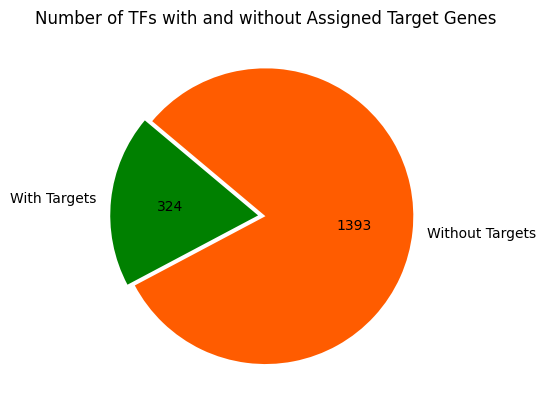

In [ ]:
fig, ax = plt.subplots()
labels = ['With Targets', 'Without Targets']
explode = (0.05, 0)
ax.pie([tfs_w, tfs_wo], labels=labels, explode=explode, startangle=140, shadow=False, autopct=absolute_value, colors=["#008000", "#ff5c00"])
ax.set_title("Number of TFs with and without Assigned Target Genes")
plt.savefig("media/piechart.png", dpi=350)
